<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_hydrogen_H2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hydrogen Molecule (H₂)**

In [ ]:
!pip install pyscf matplotlib geometric openfermion openfermionpyscf -q

In [ ]:
# Define hydrogen (H2) molecule
from pyscf import gto
mol = gto.Mole()
mol.atom = '''
    H  0.00 0.00  0.00
    H  0.00 0.00  0.74
'''

**Hartree-Fock SCF (Slater Determinant-based Hartree-Fock Hamiltonian)**

converged SCF energy = -1.12870009355644


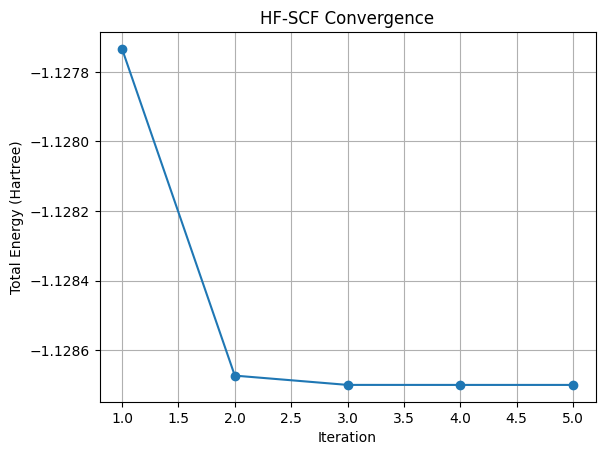

HF-SCF energy for H2O: -1.1287000935564415 Hartree


In [ ]:
# First, ensure you have the PySCF package installed
from pyscf import gto, scf
import matplotlib.pyplot as plt

# Step 1: Define the molecule using gto.M() function
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a HF-SCF calculation using Restricted Hartree-Fock (RHF) method

# scf.RHF for a restricted Hartree-Fock calculation for a closed-shell system (H₂O)
mf = scf.RHF(mol)

# Store convergence data
conv_data = []

# Callback function to collect convergence information
# (callback function captures energy values at each iteration to track the convergence process)
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform HF calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot the convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()

print(f"HF-SCF energy for H2O: {energy} Hartree")

Potentially calculate and dispaly slater determinants

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a mock wavefunction for two electrons between two atoms
def wavefunction(e1, e2):
    # This is just a fictional wavefunction for illustration
    return np.sin(e1) * np.cos(e2) - np.cos(e1) * np.sin(e2)

# Create a grid of electron positions
e1_vals = np.linspace(-np.pi, np.pi, 100)  # Position of electron 1
e2_vals = np.linspace(-np.pi, np.pi, 100)  # Position of electron 2
E1, E2 = np.meshgrid(e1_vals, e2_vals)

# Calculate wavefunction values over the grid
W = wavefunction(E1, E2)

# Plot the wavefunction as a 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
ax.plot_surface(E1, E2, W, cmap='coolwarm')

# Labels
ax.set_title('Slater Determinant (Wavefunction)')
ax.set_xlabel('Electron 1')
ax.set_ylabel('Electron 2')
ax.set_zlabel('Value of Wavefunction')

# Show the plot
plt.show()

**Configuration Interaction (CI)**



* **Full CI (FCI)** provides an exact solution to the Schrödinger equation within a given basis set but is computationally prohibitive for large systems.
* **CI with Single and Double excitations (CISD)**: A truncated version of FCI that is more computationally feasible but less accurate than CCSD.


[Configuration interaction (CI)](https://en.m.wikipedia.org/wiki/Configuration_interaction) is a is a post-Hartree-Fock linear variational method used in quantum chemistry to account for electron correlation. The simplest form is CISD (Configuration Interaction with Single and Double excitations).

Configuration interaction is used for solving the nonrelativistic Schrödinger equation within the Born–Oppenheimer approximation for a quantum chemical multi-electron system. Mathematically, **configuration simply describes the linear combination of Slater determinants used for the wave function.**

In terms of a specification of orbital occupation (for instance,
$\left.(1 \mathrm{~s})^{2}(2 \mathrm{~s})^{2}(2 \mathrm{p})^{1} \ldots\right)$, interaction means the mixing (interaction) of
different electronic configurations (states).

* Due to the long
$\mathrm{CPU}$ time and large memory required for $\mathrm{Cl}$ calculations, the
method is limited to relatively small systems.

* In contrast to the Hartree-Fock method, in order to account for
electron correlation, $\mathrm{Cl}$ **uses a variational wave function that is
a linear combination of configuration state functions (CSFs)
built from spin orbitals (denoted by the superscript SO)**,

> $\Psi=\sum_{I=0} c_{I} \Phi_{I}^{S O}=c_{0} \Phi_{0}^{S O}+c_{1} \Phi_{1}^{S O}+\ldots$

* where $\Psi$ is usually the electronic ground state of the system.

* If expansion includes all possible CSFs of the appropriate
symmetry, then this is a full configuration interaction

In [ ]:
!pip install pyscf -q
from pyscf import gto, scf, ci

# Step 1: Define the molecule
# H2 molecule with a bond length of 0.74 angstroms
mol = gto.M(
    atom = 'H 0 0 0; H 0 0 0.74',  # Specify the atomic coordinates
    basis = 'sto-3g',               # Choose a basis set
    symmetry = True
)

# Step 2: Perform Hartree-Fock (SCF) calculation
mf = scf.RHF(mol)  # Restricted Hartree-Fock for a closed-shell system
mf.kernel()        # Compute the SCF solution

# Step 3: Configuration Interaction calculation (CISD)
myci = ci.CISD(mf)
myci.kernel()  # Perform the CISD calculation

# Print the CISD total energy
print(f'CISD total energy: {myci.e_tot:.6f} Ha')

# Step 4: Analyze results (Optional)
# You can also print out more details, like the CI coefficients or excitation amplitudes
print("\nCISD coefficients:")
print(myci.ci)

# Final Output of Total Energy and Coefficients

converged SCF energy = -1.11675930739643
E(RCISD) = -1.137283834488502  E_corr = -0.02052452709207653
CISD total energy: -1.137284 Ha

CISD coefficients:
[-9.93646755e-01  1.20053582e-16  1.12543887e-01]


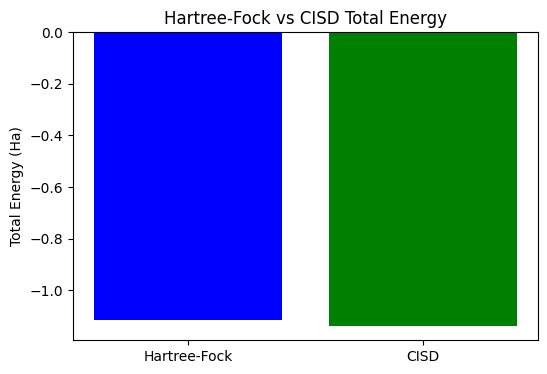

In [ ]:
import matplotlib.pyplot as plt

# Collect the energies
hf_energy = mf.e_tot  # Hartree-Fock energy
cisd_energy = myci.e_tot  # CISD total energy

# Step 1: Plot the energies
energies = [hf_energy, cisd_energy]
labels = ['Hartree-Fock', 'CISD']

plt.figure(figsize=(6, 4))
plt.bar(labels, energies, color=['blue', 'green'])
plt.ylabel('Total Energy (Ha)')
plt.title('Hartree-Fock vs CISD Total Energy')
plt.show()

**Molecular Geometry**

* Take file called h2_molecular_orbitals.molden
* Install a Molecular Viewer by installing Molden from Molden’s official website (alternatively Jmol or Avogadro)
* Open Molden and load h2_molecular_orbitals.molden file.
* Result: 3D view of H₂ molecule with options to view the orbitals.

In [ ]:
# Visualizing the Molecular Orbitals

# Import the tools for plotting orbitals
from pyscf.tools import molden

# Create a .molden file to visualize molecular orbitals using external viewers like Jmol or Molden
with open('h2_molecular_orbitals.molden', 'w') as f:
    molden.header(mol, f) # Write molecular header
    molden.orbital_coeff(mol, f, mf.mo_coeff)  # Write the molecular orbitals

print("Molecular orbitals saved to 'h2_molecular_orbitals.molden'. You can view it using a tool like Jmol or Molden.")

**Variational Quantum Eigensolve (VQE) for Ground State Calculation**

In [ ]:
!pip install pennylane -q

import pennylane as qml
from pennylane import numpy as np

# Define the molecular system
symbols = ['H', 'H']
coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.7414])  # Atomic units

# Generate the molecular Hamiltonian directly in PennyLane
H, qubits = qml.qchem.molecular_hamiltonian(
    symbols,
    coordinates,
    charge=0,
    mult=1,  # Singlet state
    basis='sto-3g',
    active_electrons=2,
    active_orbitals=2,
    mapping='jordan_wigner'
)

# Define the quantum device
dev = qml.device('default.qubit', wires=qubits)

# Define the ansatz (parameterized quantum circuit)
def ansatz(params):
    for i in range(qubits):
        qml.RY(params[i], wires=i)
    qml.CNOT(wires=[0, 1])

# Define the cost function (expectation value of the Hamiltonian)
@qml.qnode(dev)
def cost_fn(params):
    ansatz(params)
    return qml.expval(H)

# Perform the VQE optimization
optimizer = qml.GradientDescentOptimizer(stepsize=0.1)
params = np.random.randn(qubits)
for i in range(100):
    params = optimizer.step(cost_fn, params)

# Extract the ground state energy
ground_state_energy = cost_fn(params)

# Compute excited state energies (modify the ansatz and cost function accordingly)
# ...

print("Ground state energy:", ground_state_energy)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 978.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.8 MB/s eta 0:00:00
Ground state energy: -0.868784928020456


**Approach**
1. Molecular System Definition: Specify the atomic symbols and coordinates (in atomic units) for H₂
2. Hamiltonian Generation with PennyLane qml.qchem.molecular_hamiltonian to directly generate the qubit Hamiltonian. Specify charge, multiplicity, basis set, active electrons and orbitals, and fermion-to-qubit mapping.
3. Quantum Device, Ansatz, and Cost Function used H generated by PennyLane directly in cost function.
4. VQE Optimization to find the ground state energy.
5. Adapt the ansatz and cost function to target excited states

**Outlook**

* active_electrons and active_orbitals parameters control the size of active space, which can impact the accuracy and computational cost. Choosen based on system and desired accuracy.
* Excited state calculation: modify ansatz and cost function appropriately to target specific excited states. Techniques like subspace search or symmetry constraints might be needed.
* Extend  to more complex molecules by changing the molecular geometry and basis set
* Use more advanced ansätze like Unitary Coupled Cluster (UCC) for more accurate results

**Restricted Hartree-Fock (RHF)**

In [ ]:
!pip install pyscf -q
from pyscf import gto, scf, tddft

# Define the molecular system
mol = gto.M(
    atom = 'H 0 0 0; H 0 0 0.74',  # Hydrogen molecule
    basis = '6-31g',
    verbose = 4,
)

# Perform a ground-state calculation
myhf = scf.RHF(mol).run()

# Excited-state calculation using TDDFT
mytd = tddft.TDA(myhf).run()
mytd.analyze()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 17.5 MB/s eta 0:00:00
System: uname_result(system='Linux', node='5af4d54b094f', release='6.1.85+', version='#1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024', machine='x86_64')  Threads 2
Python 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
numpy 1.26.4  scipy 1.13.1  h5py 3.11.0
Date: Sun Sep 29 12:45:08 2024
PySCF version 2.7.0
PySCF path  /usr/local/lib/python3.10/dist-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 2
[INPUT] num. electrons = 2
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 H      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.000000000000 Bohr   0.0
[INPUT]  2 H      0.000000000000   0.000000000000   0.

**Interpretation**
* The molecule has a strong absorption band around 81.31 nm (corresponding to the first excited state). This transition involves significant electron redistribution along the Z-axis.
* The second excited state is "dark" (very low oscillator strength), which means that it won't be easily observed in absorption spectroscopy.
* The third excited state has a weaker absorption band at 28.26 nm.

* **Specify atomic coordinates (of Hydrogen molecule) and basis set ('6-31g')**. The choice of basis set significantly impacts the accuracy of the results. Larger basis sets generally lead to improved accuracy but increased computational cost.
* **Restricted Hartree-Fock (RHF) calculation is performed to obtain the ground-state wavefunction**.
* **Time-dependent density functional theory (TDDFT) is employed for excited-state calculation, using Tamm-Dancoff approximation (TDA)**.
  * TDDFT is just one of several methods for excited-state calculations. Other options in PySCF include configuration interaction singles (CIS), complete active space self-consistent field (CASSCF), and equation-of-motion coupled-cluster (EOM-CC).
  * For TDDFT, selecting an appropriate functional is crucial. Some functionals are known to perform better for specific types of excited states.
* **analyze() function provides summary of calculated excitation energies and oscillator strengths**.
* There are alternative excited-state calculation methods for more advanced features: solvent effects, spin-orbit coupling, and non-adiabatic dynamics

**Singlet Excitation Energies and Oscillator Strengths:**
* Excited State 1:
  * Energy: 15.2476 eV
  * Wavelength: 81.31 nm (corresponds to the energy difference between the ground and excited state)
  * Oscillator Strength (f): 0.7700 (indicates the intensity of the transition; a higher value means a stronger absorption)
  * The transition is primarily from orbital 1 to orbital 2 (coefficient 0.70703)
* Excited State 2:
  * Energy: 28.7709 eV
  * Wavelength: 43.09 nm
  * Oscillator Strength (f): 0.0000 (this transition is "forbidden," meaning it's very unlikely to occur upon light absorption)
  * The transition is primarily from orbital 1 to orbital 3
* Excited State 3:
  * Energy: 43.8775 eV
  * Wavelength: 28.26 nm
  * Oscillator Strength (f): 0.1083 (a weaker transition compared to the first excited state)
  * The transition is primarily from orbital 1 to orbital 4


**Transition Electric/Velocity/Magnetic Dipole Moments:**
* tables describe changes in the molecule's electric and magnetic properties upon excitation.
* Electric Dipole Moments: Important for light absorption and emission.
* Velocity Dipole Moments: Related to the rate of change of the electron density during the transition.
* Magnetic Dipole Moments: Relevant for magnetic interactions and certain types of spectroscopy.
* here the first excited state has a significant electric dipole transition moment along the Z-axis,consistent with its high oscillator strength. The other states have negligible dipole moments, indicating weak or forbidden transitions.